# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 5.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
396164,0.0049,0.0024,0.0049,0.0024,0.0024,0.0122,0.2393,0.3442,0.0024,0.1855,0,8,0,17
354018,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1514,0.1758,0.4517,0.2319,1,0,13,0
339706,0.0024,0.0171,0.0171,0.0024,0.0024,0.0024,0.1831,0.3418,0.4077,0.1172,0,0,0,0
264651,0.0049,0.1440,0.0024,0.0024,0.0049,0.0024,0.1636,0.2759,0.0903,0.1709,0,0,0,0
6657,0.0049,0.2588,0.0024,0.0024,0.0024,0.0024,0.0269,0.1270,0.0024,0.1563,8,0,1,0


In [3]:
raw_data.shape

(457542, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457542 entries, 0 to 457541
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          457542 non-null  float64
 1   Emg2          457542 non-null  float64
 2   Emg3          457542 non-null  float64
 3   Emg4          457542 non-null  float64
 4   Emg5          457542 non-null  float64
 5   Emg6          457542 non-null  float64
 6   Emg7          457542 non-null  float64
 7   Emg8          457542 non-null  float64
 8   Emg9          457542 non-null  float64
 9   Emg10         457542 non-null  float64
 10  repetition    457542 non-null  int64  
 11  rerepetition  457542 non-null  int64  
 12  stimulus      457542 non-null  int64  
 13  restimulus    457542 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.9 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000,457542.000000
mean,0.003303,0.278760,0.177623,0.155209,0.042417,0.048302,0.324129,0.496742,0.163677,0.330758,3.221488,2.608939,5.708877,4.624408
std,0.006182,0.430364,0.444744,0.347002,0.092262,0.096046,0.482787,0.504943,0.181937,0.293560,3.489071,3.373117,6.594250,6.359818
min,0.000000,0.000000,0.002400,0.002400,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.012200,0.002400,0.002400,0.002400,0.002400,0.097700,0.214800,0.034200,0.173300,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.144000,0.026900,0.007300,0.002400,0.009800,0.175800,0.341800,0.105000,0.249000,2.000000,0.000000,3.000000,0.000000
75%,0.002400,0.354000,0.161100,0.170900,0.039100,0.048800,0.329600,0.585900,0.236800,0.378400,6.000000,5.000000,10.000000,9.000000
max,0.593300,4.665500,4.660600,4.665500,1.369600,1.420900,4.665500,4.668000,2.927200,3.752400,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     189565
8      15503
7      15495
12     15495
2      15495
4      15488
5      15469
6      15461
9      15451
11     15451
10     15424
3      15422
1      15421
13     10331
14     10330
17     10321
15     10293
16     10254
19      5163
21      5163
18      5161
22      5135
20      5126
23      5125
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

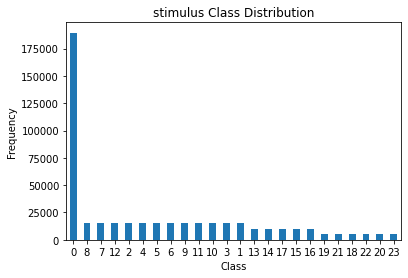

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
133160,0.0024,1.2964,0.0635,0.0269,0.0195,0.0195,0.1514,0.3735,0.0269,0.4614,9,9,4,4
378689,0.0024,0.0024,0.0049,0.0024,0.0024,0.0098,0.3442,0.2637,0.0513,0.1416,9,9,15,15
53566,0.0024,0.2881,1.1548,0.2417,0.0879,0.0977,0.2148,1.5234,0.2051,1.4917,4,4,7,7
207751,0.0024,0.3809,0.7153,0.3296,0.0659,0.0610,0.2026,0.2905,0.2075,0.1953,8,8,13,13
63065,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0635,0.0024,0.0024,0,0,0,0


In [12]:
raw_data.shape

(381505, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381505 entries, 0 to 457541
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          381505 non-null  float64
 1   Emg2          381505 non-null  float64
 2   Emg3          381505 non-null  float64
 3   Emg4          381505 non-null  float64
 4   Emg5          381505 non-null  float64
 5   Emg6          381505 non-null  float64
 6   Emg7          381505 non-null  float64
 7   Emg8          381505 non-null  float64
 8   Emg9          381505 non-null  float64
 9   Emg10         381505 non-null  float64
 10  repetition    381505 non-null  int64  
 11  rerepetition  381505 non-null  int64  
 12  stimulus      381505 non-null  int64  
 13  restimulus    381505 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.7 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = RandomForestClassifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred)* 100}")

Accuracy is: 92.18883107691904


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     35294
           1       0.95      0.86      0.90      2483
           2       0.96      0.90      0.93      2337
           3       0.98      0.85      0.91      2284
           4       0.96      0.83      0.89      2142
           5       0.95      0.81      0.88      2448
           6       0.97      0.89      0.93      2195
           7       0.94      0.83      0.88      2517
           8       0.93      0.83      0.88      2756
           9       0.95      0.84      0.89      2446
          10       0.96      0.87      0.91      2278
          11       0.96      0.90      0.93      2523
          12       0.96      0.90      0.93      2434
          13       0.98      0.89      0.93      1369
          14       0.95      0.84      0.89      1324
          15       0.95      0.75      0.84      1375
          16       0.97      0.92      0.95      1520
 

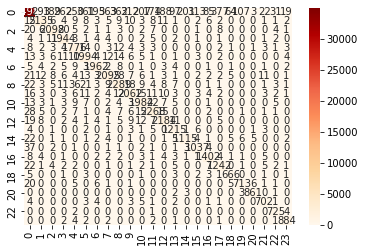

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.6636741327112358
MSE: 8.009763961153851
RMSE: 2.830152639197019


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))

Precision Score :  0.9257407214188802
Recall Score :  0.9218883107691904
f1_score :  0.920773242704874
